In [36]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Abrir transformers
import pickle

# Preprocesado
from sklearn.preprocessing import LabelEncoder # para realizar el Label Encoding 
from sklearn.preprocessing import OneHotEncoder  # para realizar el One-Hot Encoding

#  Modelado y evaluación
# -----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#  Mapas
# -----------------------------------------------------------------------------
import mapas_casuales as mc
import mapas_registrados as mr

#  Warnings
# -----------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [37]:
with open("../data/rf_bosque_reg_84-86.pkl", "rb") as r:
    pred_reg = pickle.load(r)

In [38]:
with open("../data/rf_75-75_343-339_casuales.pkl", "rb") as c:
    pred_cas = pickle.load(c)

In [39]:
# Convertimos los datos para registrados y hacemos la predicción 
def prediccion (diccionario_tiempo):

    df_tiempo = pd.DataFrame(diccionario_tiempo, index = [0])

    df_registrados=df_tiempo.copy()
    df_registrados.rename(columns ={'laborable_cod':'cod_SI'}, inplace = True)

    df_registrados["mes_map"] = df_registrados["mes_map"].map(mr.mapa_mes)
    df_registrados["estacion_map"] = df_registrados["estacion_map"].map(mr.mapa_estacion)
    df_registrados["dia_semana_map"] = df_registrados["dia_semana_map"].map(mr.mapa_dia_semana)
    df_registrados["clima_map"] = df_registrados["clima_map"].map(mr.mapa_clima)
    df_registrados["vacaciones_map"] = df_registrados["vacaciones_map"].map(mr.mapa_vacaciones)
    df_registrados["cod_SI"] = df_registrados["cod_SI"].map(mr.mapa_laborable)

    registrados = int(pred_reg.predict(df_registrados))

    #Predecimos las casuales
    df_casuales=df_tiempo.copy()
    df_casuales.rename(columns ={'vacaciones_map':'vacaciones', 'laborable_cod':'laborable_map'}, inplace = True)

    df_casuales["mes_map"] = df_casuales["mes_map"].map(mc.mapa_mes)
    df_casuales["estacion_map"] = df_casuales["estacion_map"].map(mc.mapa_estacion)
    df_casuales["dia_semana_map"] = df_casuales["dia_semana_map"].map(mc.mapa_dia_semana)
    df_casuales["clima_map"] = df_casuales["clima_map"].map(mc.mapa_clima)
    df_casuales["laborable_map"] = df_casuales["laborable_map"].map(mc.mapa_laborable)

    casuales = int(pred_cas.predict(df_casuales))

    #Calculamos el total
    total = casuales + registrados

    #Convertimos a dataFrame
    df_prediccion = pd.DataFrame({'casuales':casuales,'registrados':registrados, 'total':total}, index=[0])
    return df_prediccion

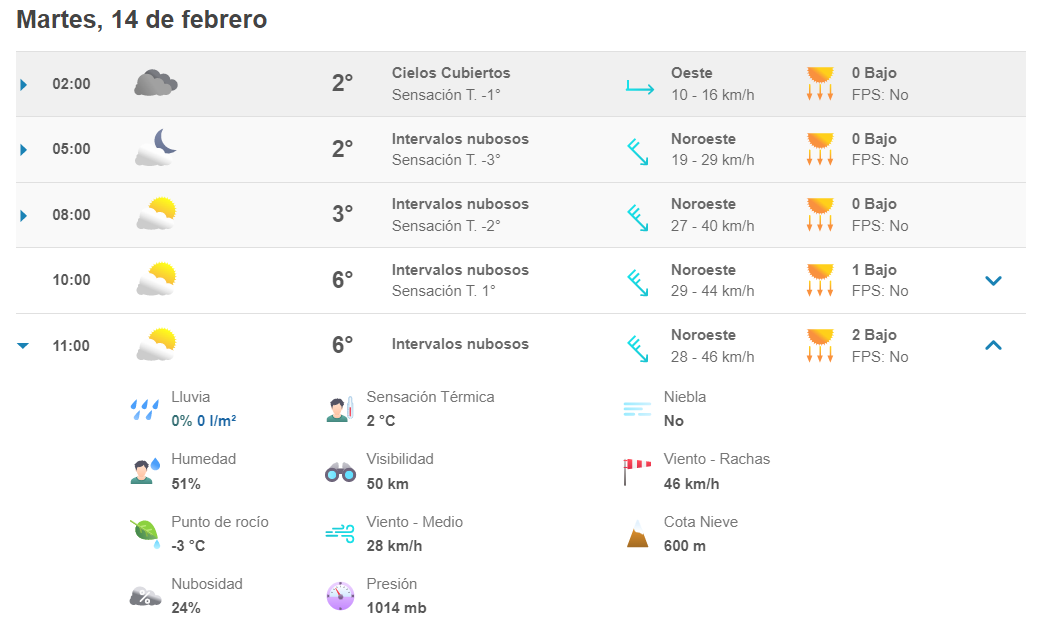

In [42]:
tiempo = {"año": 2, "sensacion_termica": 2 , "humedad": 51, "viento": 28, "mes_map": 2, "estacion_map": 'winter',
         "dia_semana_map": 2, "clima_map":1, "vacaciones_map": 0, 'laborable_cod': 'SI'}

In [43]:
prediccion(tiempo)

,casuales,registrados,total
0,1126,2266,3392
